<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/Python%202023/Caso_21_Distribuci%C3%B3n_de_probabilidad_Normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribución de probabilidad normal

# Objetivo

Calcular probabilidades, valor esperado y variabildiad de datos de varibles aleatorias con comportamiento de distribución  normal.


# Descripción

- Se cargan librerías adecuadas
- Se cargan funciones adecuadas
- Se describen ejercicios extraídos de literatura de contexos diversos con caraterísticas de distribuciones normales.
- Se calculan probabilidades
- Se calculan valores esperados y variabilidad de los datos,
- Se calculan números aletorios
- Se calculan valores de variable aletoria $x$ a partir de probabilidades específicas


# Fundamento teórico

La distribución continua de probabilidad más importante en todo el campo de la estadística es la distribución normal. Su gráfica, que se denomina curva normal, es la curva con forma de campana .

La distribución normal a menudo se denomina distribución Gaussiana, en honor de Karl Friedrich Gauss (1777-1855), quien también derivó su ecuación a partir de un estudio de errores en mediciones repetidas de la misma cantidad [@walpole2012].

## Fórmula de densidad

$$
f(x) =\frac{1}{\sigma \cdot \sqrt{2 \cdot \pi}}\cdot e
^{\frac{-1}{2}\cdot ( \frac {x - \mu}{\sigma}) ^2}
$$

En donde: $π=3.14159$ y $e=2.71828$.


## Funciones de python

En python se pueden utilizar las siguientes funciones para tratar con una distribución normal:

- *norm.rvs()* para calcular números aleatorios.
- *norm.pdf()* para calcular la densidad.
- *norm.cdf()* para calcular la probabilidad acumulada.
- *norm.ppf()* para calcular el valor de la a partir de una probabilidad, es la función inversa de *cdf()*.



# Desarrollo


## Cargar librerías

In [40]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

## Cargar funciones

In [84]:
# Densidad normal
def f_x_normal(x, media, desv_std):
  # Calcular la PDF de la variable aleatoria continua
  fx = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))
  return fx

# Función para visualizar la densidad de probabilidad de una distribución normal
def f_visualizar_dens_normal(valores):
    # Se calcula la media de los valores
    media = np.mean(valores)

    # Se calcula la desviacióne st´dnar de los valores
    desv_std = np.std(valores)

    # Crear un rango de valores para la crear una densidad
    x = np.linspace(media - 3 * desv_std, media + 3 * desv_std, 1000)

    # Calcular la PDF de la distribución normal
    pdf = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std **2))

    # Visualizar la PDF
    plt.plot(x, pdf, label='Normal:(media:{}; ds:{})'.format(np.round(media, 2), np.round(desv_std, 2)))
    plt.title('Función de Densidad de Probabilidad (PDF) - Distribución Normal')
    plt.xlabel('Valor de x')
    plt.ylabel('Densidad de Probabilidad')
    plt.legend()
    # plt.grid(True)
    plt.show()

def f_visualizar_dens_area_normal(valores, a, b, prob=0):
    # Se calcula la media de los valores
    media = np.mean(valores)

    # Se calcula la desviacióne st´dnar de los valores
    desv_std = np.std(valores)

    # Crear un rango de valores para la PDF
    x = np.linspace(media - 3 * desv_std, media + 3 * desv_std, 1000)

    # Calcular la PDF de la distribución normal
    pdf = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))

    # LA probailidad
    prob  = norm.cdf(b, media, desv_std) - norm.cdf(a, media, desv_std)
    # Visualizar la PDF
    plt.plot(x, pdf, label='Normal:(me:{}; ds:{})'.format(np.round(media, 2), np.round(desv_std, 2)))
    if prob == 0:
      plt.fill_between(x, 0, pdf, where=(x >= a) & (x <= b), alpha=0.3, color='red', label='Área bajo la curva')
    else:
      plt.fill_between(x, 0, pdf, where=(x >= a) & (x <= b), alpha=0.3, color='red', label='Área '+str(a) + "-"+str(b)+"="+str(np.round(prob * 100, 2))+"%")

    plt.title('Función de Densidad de Probabilidad (PDF) - Distribución Normal')
    plt.xlabel('Valor de x')
    plt.ylabel('Densidad de Probabilidad')
    plt.legend(loc='upper right')
    # plt.grid(True)
    plt.show()

# Desarrollo

## Calcular una densidad para un valor de x

Ejemplo de calcular la densidad para un valor de $x$ de acuerdo a la distribución normal con media y desviación.

- Valor de x=70;
- media=80;
- desv=5;
- e=2.71828;
- pi=3.14159

Para el ejemplo siguiente se utilzia el cálcuo de la densidad manualemnte y luego con la función *norm.pdf()*; deben salir los mismos valores para un valor de $x = 70$, con media $\mu= 80$ y desviación estándar $\sigma= 5$


In [47]:
x = 18
media = 20
desv_std = 20
v_e = 2.71828
v_pi = 3.14159

densidad_1 = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))
print ("La densidad de x = ", x, " es ", np.round(densidad_1, 4))

# Usando norm.pdf() de la librería norm
densidad_2 = norm.pdf(x, media, desv_std)
print ("La densidad de x = ", x, " es ", np.round(densidad_2, 4))

La densidad de x =  18  es  0.0198
La densidad de x =  18  es  0.0198


## Calcular números aleatorios

Se puede generar números aletorios mediante la función de la bilioteca *numpy* con la función *random.normal(media, desviación, size)*.

La función de generación de números aletorios requiere el valor de la media y la desviación de los datos así como la cantidad de números aleatorios a generar.

Ls siguiente instrucción genera 10 números aleatorios con media igual a $\mu = 80$ y desviación estándar de $\sigma = 5$

In [53]:
# Generar 10 números aleatorios de una distribución normal con media 0 y desviación estándar 1
num_aleatorios = np.random.normal(80, 5, 100)
print(np.round(num_aleatorios, 4))

[89.028  78.3421 88.8518 83.1758 75.8995 80.9805 89.716  81.7307 77.0867
 84.7552 84.4212 78.7403 84.5827 86.3789 74.7159 90.2159 76.1507 86.4473
 91.3861 88.6579 78.4592 76.7787 78.5252 82.1206 87.6599 79.5992 79.8798
 81.3763 79.6934 81.3904 81.8956 68.463  78.4845 76.9283 74.7839 77.411
 83.9247 85.9184 80.5239 83.4643 79.6852 81.4306 73.8859 82.9401 73.4446
 79.2491 74.926  80.152  78.2768 73.738  71.1248 93.3243 68.5116 76.2191
 89.2951 74.7527 78.2237 72.3782 80.5882 81.3288 80.1936 73.7346 78.3383
 81.7608 75.0182 81.2    71.7526 72.4004 74.6836 75.1447 78.6109 82.4339
 88.7747 92.4523 72.1084 79.9628 83.3622 73.3078 83.5649 84.1411 83.2555
 79.7526 78.1609 78.2305 82.5682 77.122  75.973  88.0414 83.9752 84.2038
 74.7635 80.8902 80.2728 85.6587 80.5319 78.6759 83.2811 81.6691 74.2367
 77.8776]


Se puede generar números aletorios mediante la función *norm.rvs(loc = 80, scale = 5, size = 10)* de la biblioteca scipi.stats.

Se generan 10 números aletorios con media igual a  $μ=80$  y desviación estándar de  $\sigma=5$

In [54]:
num_aleatorios = norm.rvs(loc = 80, scale = 5, size = 100)
print(np.round(num_aleatorios, 4))

[78.1004 88.7093 70.7914 84.9488 72.2974 80.9626 79.9743 82.4368 76.8851
 82.4302 75.0402 84.0755 76.1834 78.0056 87.1862 76.8892 77.4957 74.3304
 78.9637 87.1193 78.8874 81.1823 80.7828 79.3026 79.2162 75.6336 90.4258
 80.0152 84.2687 77.3956 78.0585 78.924  84.344  73.1522 80.9212 81.6381
 72.0795 80.7821 84.2659 84.299  79.2876 77.6409 76.105  83.1021 76.5982
 71.6377 78.2134 70.7023 81.177  78.5898 85.9812 82.1027 83.2769 85.5347
 80.2312 83.3387 76.4109 83.4545 74.8262 67.2897 81.1476 87.5263 80.0156
 78.0428 77.3112 80.5623 78.7188 79.2717 79.7361 75.722  84.355  86.495
 70.7273 82.784  77.3256 74.371  80.8254 92.4579 71.5037 79.0035 89.7625
 83.4884 84.5188 87.6135 72.9719 84.5063 80.08   86.311  85.8541 89.0576
 76.2632 77.2759 83.2427 69.0828 77.4994 81.8538 77.7669 72.7647 83.3291
 72.1132]


## Calcular la densidad

Se utiliza la función *f_x_normal()* previamente preparada para calcular la densidad de cada valor de números aletorios de acuerco con la fórmula de densidad de una distribución  normal.

Se calcula primero, la media y la desviación estándar de los datos.

In [61]:
media = np.mean(num_aleatorios)
desv_std = np.std(num_aleatorios)
densidad = f_x_normal(num_aleatorios, media, desv_std)
print ("La media de los números aleatorios es: ", np.round(media, 4))
print ("La desv. std de los números aleatorios es: ", np.round(desv_std, 4))
print("Las densidades: ")
print (np.round(densidad, 4))

La media de los números aleatorios es:  79.8716
La desv. std de los números aleatorios es:  5.0384
Las densidades: 
[0.0744 0.017  0.0156 0.0477 0.0256 0.0773 0.0792 0.0696 0.0664 0.0696
 0.05   0.0559 0.0606 0.0739 0.0276 0.0665 0.0708 0.0432 0.0779 0.0281
 0.0777 0.0765 0.0779 0.0787 0.0785 0.0556 0.0088 0.0791 0.0541 0.0702
 0.0742 0.0778 0.0534 0.0325 0.0775 0.0745 0.0239 0.0779 0.0541 0.0538
 0.0786 0.0718 0.0599 0.0645 0.0641 0.0208 0.075  0.0151 0.0766 0.0767
 0.038  0.0718 0.063  0.0421 0.079  0.0625 0.0625 0.0615 0.048  0.0035
 0.0767 0.025  0.0791 0.0741 0.0696 0.0784 0.0771 0.0786 0.0792 0.0564
 0.0533 0.0334 0.0153 0.067  0.0697 0.0436 0.0778 0.0035 0.0199 0.078
 0.0115 0.0612 0.0517 0.0243 0.031  0.0519 0.0791 0.035  0.0391 0.015
 0.0613 0.0693 0.0633 0.008  0.0709 0.0733 0.0726 0.0293 0.0626 0.0242]


## Visualizar densidad

Con los valores de los números aleatorios generados y la densidad de los mismos, se visualiza la curva de campana de la distribución  normal.

Se utiliza la función previamente codificada para mostar la densidad de la distribucuón normal *f_visualizar_dens_normal(valores, media, desviacion_estandar)*.



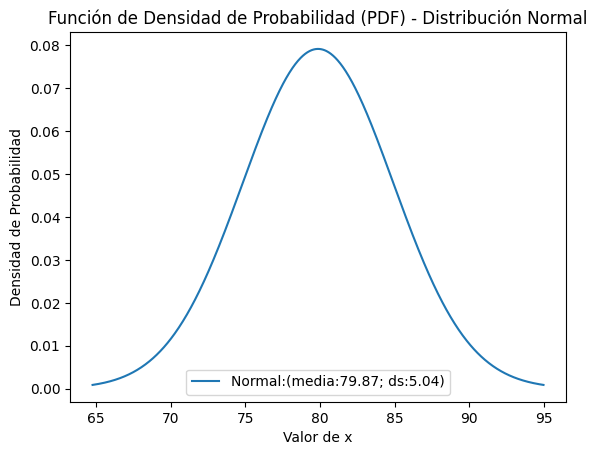

In [62]:
f_visualizar_dens_normal(num_aleatorios)

## Calcular probabilidades

Ahora bien con una densidad calculada de cada uno de los valores aleatrios generdos, ahora se puede calcular probabildia bajo un inetrvalo.

¿Cuál es la probabilidad de encontrr npumeros entre 80 y 85?

$$
F(80 \le x \le 85)
$$

Se utiliza la función *norm.cdf()*, restando la probabilidad acumulada de 85 menos la probabilidad acumulada de 80.

In [77]:
x1 = 80
x2 = 85
probabilidad  = norm.cdf(x2, media, desv_std) - norm.cdf(x1, media, desv_std)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamnte ", np.round(probabilidad * 100, 2))

La probabilidad entre  80  y  85  es 0.3355 aproximadamnte  33.55


## Visualizar probabildiades

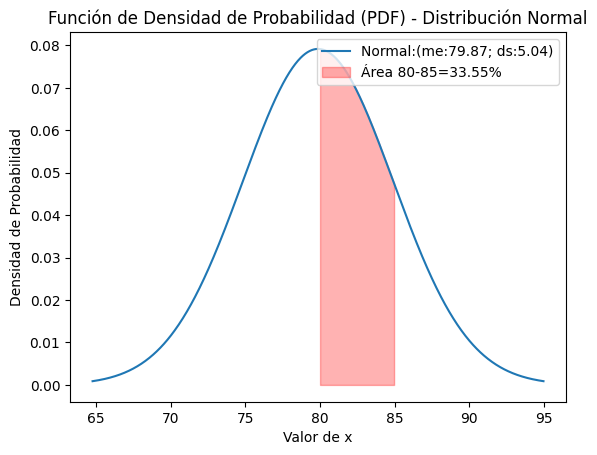

In [85]:
f_visualizar_dens_area_normal(num_aleatorios, x1, x2)

## Pendiente Ej 1


## Pendiente Ej 2

# Interpretación del caso



# Bibliografía

- UC3M. n.d. “Introducción a La Estadística y Probabilidad.” http://halweb.uc3m.es/esp/Personal/personas/mwiper/docencia/Spanish/Introduction_to_Statistics/intro_continuous2.pdf.

- Walpole, Ronald E., Raymond H. Myers, and Sharon L. Myers. 2012. Probabilidad y Estadística Para Ingeniería y Ciencias. Novena Edición. México: Pearson.